In [2]:
import imgaug as ia
from imgaug import augmenters as iaa

ia.seed(1)

image = ia.quokka(size=(256, 256))
bbs = ia.BoundingBoxesOnImage([
    ia.BoundingBox(x1=65, y1=100, x2=200, y2=150),
    ia.BoundingBox(x1=150, y1=80, x2=200, y2=130)
], shape=image.shape)

seq = iaa.Sequential([
    iaa.Multiply((1.2, 1.5)), # change brightness, doesn't affect BBs
    iaa.Affine(
        translate_px={"x": 40, "y": 60},
        scale=(0.5, 0.7)
    ) # translate by 40/60px on x/y axis, and scale to 50-70%, affects BBs
])

# Make our sequence deterministic.
# We can now apply it to the image and then to the BBs and it will
# lead to the same augmentations.
# IMPORTANT: Call this once PER BATCH, otherwise you will always get the
# exactly same augmentations for every batch!
seq_det = seq.to_deterministic()

# Augment BBs and images.
# As we only have one image and list of BBs, we use
# [image] and [bbs] to turn both into lists (batches) for the
# functions and then [0] to reverse that. In a real experiment, your
# variables would likely already be lists.
image_aug = seq_det.augment_images([image])[0]
bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

# print coordinates before/after augmentation (see below)
# use .x1_int, .y_int, ... to get integer coordinates
for i in range(len(bbs.bounding_boxes)):
    before = bbs.bounding_boxes[i]
    after = bbs_aug.bounding_boxes[i]
    print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f)" % (
        i,
        before.x1, before.y1, before.x2, before.y2,
        after.x1, after.y1, after.x2, after.y2)
    )

# image with BBs before/after augmentation (shown below)
image_before = bbs.draw_on_image(image, thickness=2)
image_after = bbs_aug.draw_on_image(image_aug, thickness=2, color=[0, 0, 255])

BB 0: (65.0000, 100.0000, 200.0000, 150.0000) -> (130.7524, 171.3311, 210.1272, 200.7291)
BB 1: (150.0000, 80.0000, 200.0000, 130.0000) -> (180.7291, 159.5718, 210.1272, 188.9699)


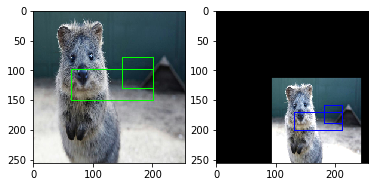

In [6]:
import matplotlib.pyplot as plt
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(image_before)
ax2.imshow(image_after)

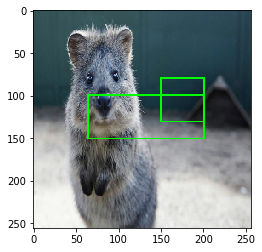

In [6]:
plt.imshow(image_before)

In [6]:
image.size

196608

In [5]:
ia.quokka()

Array([[[ 49,  78,  82],
        [ 49,  78,  82],
        [ 49,  78,  82],
        ...,
        [ 38,  66,  78],
        [ 38,  66,  78],
        [ 38,  66,  78]],

       [[ 49,  78,  82],
        [ 49,  78,  82],
        [ 49,  78,  82],
        ...,
        [ 38,  66,  78],
        [ 38,  66,  78],
        [ 38,  66,  78]],

       [[ 49,  78,  82],
        [ 49,  78,  82],
        [ 49,  78,  82],
        ...,
        [ 39,  67,  79],
        [ 39,  67,  79],
        [ 39,  67,  79]],

       ...,

       [[237, 238, 232],
        [237, 238, 232],
        [236, 237, 231],
        ...,
        [209, 210, 205],
        [209, 210, 205],
        [208, 209, 204]],

       [[237, 238, 232],
        [237, 238, 232],
        [236, 237, 231],
        ...,
        [209, 210, 205],
        [209, 210, 205],
        [208, 209, 204]],

       [[237, 238, 232],
        [237, 238, 232],
        [236, 237, 231],
        ...,
        [209, 210, 205],
        [209, 210, 205],
        [208, 209, 204]]